<a href="https://colab.research.google.com/github/LohitSubodh/Optimization/blob/main/Regression%26PCA_2017meb1219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME504 Assignment-2 
### Submitted by
### Lohit Subodh (2017meb1219)

# (1) Polynomial Regression

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


Taking mass and stiffness constant as last two digits  and first two digits of my rollno. respectively.

In [ ]:
mass=19
stiffness_constant=12

In [ ]:
# Calculating the omega
import math  
w=math.sqrt(stiffness_constant/mass)
print(w)

0.7947194142390263


In [ ]:
# Generating input values from 0 to 2pi
import random
x=np.arange(0,2*math.pi,0.01)
x=torch.tensor(x).float()
print(type(x))

<class 'torch.Tensor'>


In [ ]:
# Defining initial conditions
initial_displacement=2
initial_velocity=0

In [ ]:
# Generating noise from normal distribution
e=np.random.normal(0.02,2, x.shape[0])

In [ ]:
print(e)

[ 6.53357588e-01  2.24811576e+00 -3.42342654e+00 -3.29415849e+00
  1.45513345e+00  4.80363287e-01  1.52052620e+00 -9.45158630e-01
  9.86602086e-01  1.78178471e+00  2.73062894e+00  1.29538070e+00
  5.12728430e+00  1.23784535e+00  1.65137538e+00 -2.52465809e+00
 -2.24268155e+00 -1.23029633e+00 -2.20989726e+00  5.08180508e-01
  1.21443522e-01  2.22103863e+00  7.89726240e-01  1.12783038e+00
 -6.01282056e-01 -1.88634826e-01 -3.54520678e+00 -2.48431678e+00
 -4.41450435e-01  1.89942783e+00  3.04874214e-01  3.16500321e+00
 -2.00511769e+00  6.99696301e-01 -2.07650055e+00  1.63883462e+00
  8.69725478e-03  1.55615346e-01 -3.31112409e-01 -2.59305308e-01
 -2.35932452e+00 -6.32571862e-01  3.64531740e-01 -6.16758106e-02
 -1.38682986e+00  2.01342636e+00 -2.58707872e+00 -1.15017836e+00
 -1.60859754e+00 -1.19330914e+00  4.09285509e+00  8.80107415e-01
  1.57255893e+00 -1.49575786e+00  1.17543293e+00 -5.77136908e+00
 -1.98998456e+00  2.28195431e+00  5.03891289e-01  3.82387995e+00
 -3.14722345e-01 -1.02557

In [ ]:
# Displacement values at given time
y=[2*math.cos(w*i) for i in x]
y=torch.tensor(y).float()
print(type(y))

<class 'torch.Tensor'>


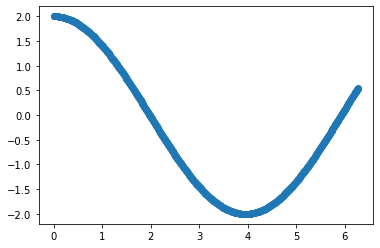

In [ ]:
# plotting displacement vs time 
plt.scatter(x,y)

In [ ]:
# adding noise to displacement values
y=y+e

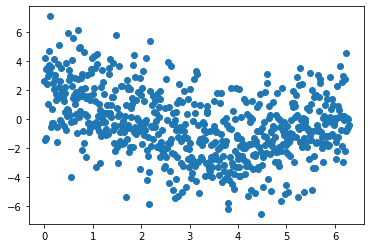

In [ ]:
# plotting displacement vs time after adding noise
plt.scatter(x, y)

In [ ]:
# Function for creating basis function
# returns the features after applying basis function
# Taking polynomial as basis function
def create_features(X, degree, standardize):
    
    if len(X.shape) == 1:
        X = X.unsqueeze(1)
    # Adding bias of 0.02 to input data
    bias_col=np.full((X.shape[0], 1), 0.02, dtype=float)
    bias_col=torch.tensor(bias_col)

    
    X_d = torch.cat([bias_col, X], axis=1)
    for i in range(1, degree):
        X_pow = X.pow(i + 1)
        # If we are using the gradient descent method, we need to
        # standardize the features to avoid exploding gradients
        if standardize:
            X_pow -= X_pow.mean()
            std = X_pow.std()
            if std != 0:
                X_pow /= std
        X_d = torch.cat([X_d, X_pow], axis=1)
    return X_d

In [ ]:
# Taking degree as 4
features = create_features(x, degree=4, standardize=False)

In [ ]:
# Function for predicting displacement
def predict(features, weights):
    return features.mm(weights)

In [ ]:
y_true = y.unsqueeze(1)
y_true=y_true.double()

In [ ]:
# Function for closed form solution or using normal equation
def normal_equation(y_true, X):
    
    XTX_inv = (X.T.mm(X)).inverse()
    XTy = X.T.mm(y_true)
    weights = XTX_inv.mm(XTy)
    return weights

In [ ]:
weights = normal_equation(y_true, features)

In [ ]:
y_pred = predict(features, weights)
print((y_pred.shape))

torch.Size([629, 1])


In [ ]:
y_pred=y_pred.squeeze(1)
print(y_pred.shape)

torch.Size([629])


In [ ]:
print(y.shape)

torch.Size([629])


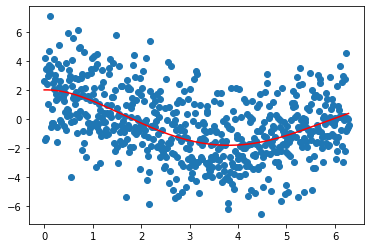

In [ ]:
# Plot showing predicted values and analytical solution
plt.scatter(x, y)
plt.plot(x, y_pred, c='red')


We can observe that our model captures the data accurately by taking degree as 4.

##Taking degree as 2 

In [ ]:
features_2 = create_features(x, degree=2, standardize=False)

In [ ]:
weights_2 = normal_equation(y_true, features_2)

In [ ]:
y_pred_2 = predict(features_2, weights_2)

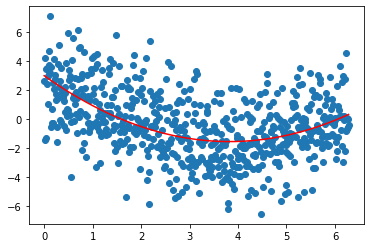

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred_2, c='red')


We can observe that underfitting occurs when we take degree as 2.

## Taking degree 9

In [ ]:
features_9 = create_features(x, degree=9, standardize=False)

In [ ]:
weights_9 = normal_equation(y_true, features_9)

In [ ]:
y_pred_9 = predict(features_9, weights_9)

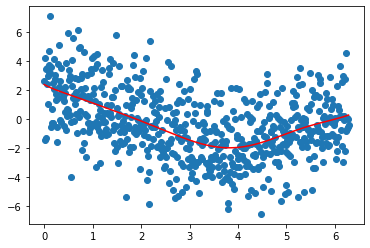

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred_9, c='red')

We can observe that our model is overfitting as it is capturing the noise for degree=9.

## Taking less number of data points

In [ ]:

x_low=np.arange(0,2*math.pi,0.1)
x_low=torch.tensor(x_low).float()
print(len(x_low))

63


In [ ]:
y_low=[2*math.cos(w*i) for i in x_low]
y_low=torch.tensor(y_low).float()
print(type(y_low))

<class 'torch.Tensor'>


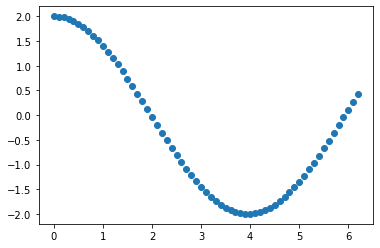

In [ ]:
plt.scatter(x_low, y_low)


In [ ]:
e_low=np.random.normal(0.02,2, x_low.shape[0])

In [ ]:
y_low=y_low+e_low

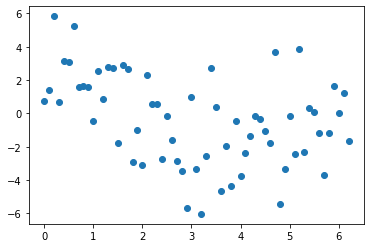

In [ ]:
# Plot after adding noise to displacement values
plt.scatter(x_low,y_low)

In [ ]:
# taking degree as 4
features_low = create_features(x_low, degree=4, standardize=False)

In [ ]:
y_true_low = y_low.unsqueeze(1)
y_true_low=y_true_low.double()

In [ ]:
weights_low = normal_equation(y_true_low, features_low)

In [ ]:
y_pred_low = predict(features_low, weights_low)

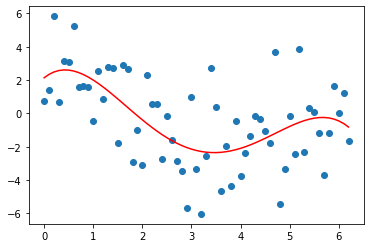

In [ ]:
plt.scatter(x_low, y_low)
plt.plot(x_low, y_pred_low, c='red')

We can observe that our model is overfitting.

## Solving using gradient descent.

In [ ]:
# Function for gradient descent
def gradient_descent(X, y_true, lr=0.001, it=40000):
    
    
    weights_gd = torch.ones((X.shape[1], 1)).double()
    n = X.shape[0]
    fact = 2 / n
    for _ in range(it):
        y_pred = predict(X, weights_gd)
        grad = fact * X.T.mm(y_pred - y_true)
        weights_gd -= lr * grad
    return weights_gd

In [ ]:
# Taking degree as 3
features_gd = create_features(x, degree=3, standardize=True)
weights_gd = gradient_descent(features_gd, y_true)

In [ ]:
pred_gd = predict(features_gd, weights_gd)

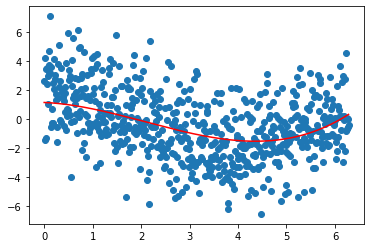

In [ ]:
# PLot showing predicted and actual values
plt.scatter(x, y)
plt.plot(x, pred_gd, c='red')

We can observe that our model is predicting dispacement values nicely.

#(2) PCA

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n=int(input("Enter initial number of features:"))

Enter initial number of features:8


In [ ]:
# defining spring constants and Forces using normal distribution
# initial features=8
# number of examples=10
from numpy import random
spring_constants=random.normal(loc=19,scale=5,size=(10,n))
print("Spring constants:",spring_constants)
Forces=random.normal(loc=0,scale=5,size=(10,n))
print("Forces :",Forces)



Spring constants: [[17.55649948 20.4197468  18.72911985 21.64277613 21.04910298 18.95536565
  26.38306505 16.97318415]
 [16.45442884 16.12172555 18.59754814 18.20292118 18.75225855 15.33810701
  21.99768383 23.21280995]
 [25.34982405 13.3831181  20.50686485 25.48901217 20.67941867 17.96725945
  16.35943113 13.54268155]
 [23.65013537 21.67712423 25.49446885 16.73444238 23.09999703 12.65284088
  20.1846506  27.38466916]
 [24.32968056 30.1556538   9.1695587  25.20084751 11.49528301 16.19888122
  19.63101396 15.65163179]
 [19.11174053 25.2578254  16.88201219 24.98776041 16.50294715 14.64372651
  26.71316057 16.46320371]
 [20.18449012 25.41745176  6.52174879 26.09040637 22.12496866 16.27865704
  31.83348459 20.6373128 ]
 [14.23061645 19.98715701 27.05569672 25.28961467 29.69460775 23.89503488
  24.99837683  3.75156113]
 [18.88002393 19.03648016 16.38946842 15.08946707 24.70490621 25.69945308
  14.01642928 12.2196553 ]
 [24.31901028 21.5209308  21.85899631 12.1898416  14.2942018  23.18723783

In [ ]:
# Converting to numpy matrix
Forces=np.matrix(Forces)

In [ ]:
# Function for creating stiffness matrix for features=6
def get_stiffness_matrix(k,n):
  K=np.zeros((n,n))
  for i in range(n-1):
    K[i][i]=k[i]+k[i+1]
    K[i][i+1]=-k[i+1]
    K[i+1][i]=K[i][i+1]
  K[n-1][n-1]=k[n-1]
  
  return np.matrix(K)                  


In [ ]:
# Calculating the displacement matrix
A=np.empty((0,n), float)
for i in range(0,10):
  stiffness_matrix=get_stiffness_matrix(spring_constants[i],n)
  x=np.linalg.pinv(stiffness_matrix) * (Forces[i].transpose())
  x=x.transpose()
  #print(x.shape)
  A=np.append(A,np.array(x),axis=0 )
print(A)  

[[ 0.68013524  1.33608266  1.81360473  1.87472294  1.80682082  1.76032357
   1.92215843  2.22916956]
 [ 0.34906547  0.76217532  0.95447343  1.2430794   1.47688745  1.82702469
   1.99982104  2.30103276]
 [-0.60195323 -1.98135408 -2.94262458 -3.85946376 -4.63634882 -5.42338973
  -6.09426258 -6.70517829]
 [-0.33432894 -1.10040532 -1.60364352 -2.28017462 -2.3740299  -2.38875453
  -2.31348176 -2.257805  ]
 [ 0.02472882  0.13839763  0.15158849  0.36109623  0.65426447  0.28812424
   0.33752928  0.54470717]
 [-0.61882789 -1.07365313 -1.54449864 -1.94748103 -2.47399496 -3.22320472
  -3.46180909 -3.65166415]
 [-0.6177161  -1.3176702  -3.86973732 -4.2261209  -4.648645   -4.93979252
  -4.85043458 -4.87371677]
 [-0.61738541 -0.93389234 -1.27355364 -1.61504506 -1.7641051  -1.61394637
  -1.46983893 -1.55693033]
 [ 0.04442725 -0.22861177 -0.53911122 -0.85107703 -0.96930233 -1.00461725
  -1.112579   -1.23250913]
 [-0.33732401 -0.75810743 -1.1165249  -1.51811182 -1.22427319 -0.94588391
  -0.89428861 -0.

In [ ]:
type(A)

numpy.ndarray

In [ ]:
# Calculating mean of displacement matrix
col_mean = np.mean(A, axis = 0)
print(col_mean)

[-0.20291788 -0.51570387 -0.99700272 -1.28185757 -1.41527266 -1.56641165
 -1.59371858 -1.58471786]


In [ ]:
# Subtracting from mean
A_mean=A-col_mean

In [ ]:
# Calculating covariance matrix of displacement
cov_matrix=np.cov(A.transpose())
print(cov_matrix)

[[0.21209513 0.44364536 0.70443551 0.83215843 0.92609876 1.00485822
  1.05776408 1.14470242]
 [0.44364536 1.02782934 1.6157097  1.95122051 2.18989866 2.38935079
  2.55043594 2.77463259]
 [0.70443551 1.6157097  2.89258656 3.38301744 3.78575611 4.09996481
  4.30961909 4.63779805]
 [0.83215843 1.95122051 3.38301744 4.01593755 4.51345671 4.8916816
  5.16628492 5.57765795]
 [0.92609876 2.18989866 3.78575611 4.51345671 5.13962794 5.62562413
  5.96866163 6.46916034]
 [1.00485822 2.38935079 4.09996481 4.8916816  5.62562413 6.26688861
  6.68915684 7.26951217]
 [1.05776408 2.55043594 4.30961909 5.16628492 5.96866163 6.68915684
  7.1788441  7.82419729]
 [1.14470242 2.77463259 4.63779805 5.57765795 6.46916034 7.26951217
  7.82419729 8.55004738]]


In [ ]:
# Calculating eigen vectors and eigen values of covariance matrix
from numpy.linalg import eig
eigvalues, eigvectors = eig(cov_matrix)
print(eigvalues)
print(eigvectors)

[3.45634416e+01 5.43083556e-01 1.16414168e-01 3.38278240e-02
 1.74698556e-02 8.04838515e-03 1.00454213e-03 5.66717468e-04]
[[-0.06918517 -0.14201335  0.44077429  0.46506881  0.53821922  0.25426334
   0.39276789  0.23638583]
 [-0.16459114 -0.1556698   0.81348595 -0.09636105 -0.16900877 -0.198264
  -0.33842364 -0.30859147]
 [-0.28059776 -0.52582213 -0.25294817  0.56482975 -0.36365475  0.24234015
  -0.15135245 -0.2188138 ]
 [-0.33504301 -0.49000352  0.01888302 -0.3393166  -0.21950264 -0.27757161
   0.27988497  0.57322543]
 [-0.38369454 -0.25259803 -0.14857563 -0.52114277  0.44494199  0.38523193
  -0.00194887 -0.38591115]
 [-0.42518199  0.10590316 -0.20379467  0.23047968  0.45666705 -0.48514985
  -0.4920334   0.16534693]
 [-0.45376517  0.33173727 -0.03528671  0.12131358 -0.13971697 -0.33887544
   0.59874322 -0.41861029]
 [-0.49318373  0.50392053  0.12152023 -0.02880073 -0.27439191  0.51152343
  -0.17136379  0.34774211]]


In [ ]:
# Sorting eigenvalues and eigenvectors
def eig_sort(eigvalues,eigvectors):
  idx=eigvalues.argsort()[::-1]
  eigvalues=eigvalues[idx]
  eigvectors=eigvectors[:,idx]
  return eigvalues,eigvectors

In [ ]:
eigvalues,eigvectors=eig_sort(eigvalues,eigvectors)

In [ ]:
print(eigvalues)
print(eigvectors)

[3.45634416e+01 5.43083556e-01 1.16414168e-01 3.38278240e-02
 1.74698556e-02 8.04838515e-03 1.00454213e-03 5.66717468e-04]
[[-0.06918517 -0.14201335  0.44077429  0.46506881  0.53821922  0.25426334
   0.39276789  0.23638583]
 [-0.16459114 -0.1556698   0.81348595 -0.09636105 -0.16900877 -0.198264
  -0.33842364 -0.30859147]
 [-0.28059776 -0.52582213 -0.25294817  0.56482975 -0.36365475  0.24234015
  -0.15135245 -0.2188138 ]
 [-0.33504301 -0.49000352  0.01888302 -0.3393166  -0.21950264 -0.27757161
   0.27988497  0.57322543]
 [-0.38369454 -0.25259803 -0.14857563 -0.52114277  0.44494199  0.38523193
  -0.00194887 -0.38591115]
 [-0.42518199  0.10590316 -0.20379467  0.23047968  0.45666705 -0.48514985
  -0.4920334   0.16534693]
 [-0.45376517  0.33173727 -0.03528671  0.12131358 -0.13971697 -0.33887544
   0.59874322 -0.41861029]
 [-0.49318373  0.50392053  0.12152023 -0.02880073 -0.27439191  0.51152343
  -0.17136379  0.34774211]]


In [ ]:
# transformed space features
transformed_features=np.dot(np.dot(A_mean,eigvectors),eigvectors.transpose())+ col_mean
print(transformed_features)

[[ 0.68013524  1.33608266  1.81360473  1.87472294  1.80682082  1.76032357
   1.92215843  2.22916956]
 [ 0.34906547  0.76217532  0.95447343  1.2430794   1.47688745  1.82702469
   1.99982104  2.30103276]
 [-0.60195323 -1.98135408 -2.94262458 -3.85946376 -4.63634882 -5.42338973
  -6.09426258 -6.70517829]
 [-0.33432894 -1.10040532 -1.60364352 -2.28017462 -2.3740299  -2.38875453
  -2.31348176 -2.257805  ]
 [ 0.02472882  0.13839763  0.15158849  0.36109623  0.65426447  0.28812424
   0.33752928  0.54470717]
 [-0.61882789 -1.07365313 -1.54449864 -1.94748103 -2.47399496 -3.22320472
  -3.46180909 -3.65166415]
 [-0.6177161  -1.3176702  -3.86973732 -4.2261209  -4.648645   -4.93979252
  -4.85043458 -4.87371677]
 [-0.61738541 -0.93389234 -1.27355364 -1.61504506 -1.7641051  -1.61394637
  -1.46983893 -1.55693033]
 [ 0.04442725 -0.22861177 -0.53911122 -0.85107703 -0.96930233 -1.00461725
  -1.112579   -1.23250913]
 [-0.33732401 -0.75810743 -1.1165249  -1.51811182 -1.22427319 -0.94588391
  -0.89428861 -0.

In [ ]:
# Function for plotting mse for different r values and printing mse
def plotmse(r,eigvectors,A_mean):
  mse=[]
  r_features=list(range(1,r+1))
  
  for x in range(0,r):
    # taking largest eigen values corresponding eigen vectors
    weight=eigvectors[:,0:x+1]
    error=np.square(A_mean-np.dot(np.dot(A_mean,weight),weight.transpose())).mean()
    mse.append(error)
  print(mse)
  plt.plot(r_features,mse)
  return mse

[0.08104669298410035, 0.01994979288344659, 0.006853198983968238, 0.0030475687851750743, 0.0010822100343252314, 0.00017676670504262714, 6.375571511543646e-05, 1.0633247317104388e-28]


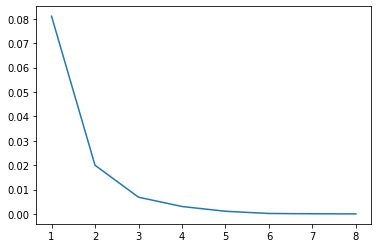

In [ ]:
pca_mse=plotmse(n,eigvectors,A_mean)

## Solving using mode shape approach

In [ ]:
# stiffness matrix 
print(stiffness_matrix)

[[ 45.83994108 -21.5209308    0.           0.           0.
    0.           0.           0.        ]
 [-21.5209308   43.37992711 -21.85899631   0.           0.
    0.           0.           0.        ]
 [  0.         -21.85899631  34.04883791 -12.1898416    0.
    0.           0.           0.        ]
 [  0.           0.         -12.1898416   26.4840434  -14.2942018
    0.           0.           0.        ]
 [  0.           0.           0.         -14.2942018   37.48143963
  -23.18723783   0.           0.        ]
 [  0.           0.           0.           0.         -23.18723783
   46.18741352 -23.00017569   0.        ]
 [  0.           0.           0.           0.           0.
  -23.00017569  43.49787122 -20.49769553]
 [  0.           0.           0.           0.           0.
    0.         -20.49769553  20.49769553]]


In [ ]:
len(stiffness_matrix)

8

In [ ]:
# Calculating eigen vectors and eigen values for stiffness_matrix
from numpy.linalg import eig
mode_eigvalues, mode_eigvectors = eig(stiffness_matrix)
print(mode_eigvalues)
print(mode_eigvectors)

[73.37758366 79.1678083  52.18056137 42.68975084 28.22673679 14.93244917
  0.64464113  6.19763815]
[[-0.54864163  0.04390424 -0.22320628 -0.60812155 -0.35646357 -0.28715057
  -0.06783137 -0.25161299]
 [ 0.70202805 -0.06799124  0.06576232 -0.0890156  -0.29173765 -0.41239405
  -0.14245011 -0.46347989]
 [-0.42325447  0.06809106  0.19327771  0.59590592  0.14871094 -0.25398344
  -0.21171385 -0.54066056]
 [ 0.10668217 -0.13010656 -0.40541595 -0.2627909   0.59417526  0.34120819
  -0.32472239 -0.4041759 ]
 [ 0.01096252  0.42146349  0.56398767 -0.21024513 -0.19925758  0.49233364
  -0.40644971 -0.1125428 ]
 [-0.08273726 -0.67750687 -0.10760342  0.20922752 -0.44581984  0.26843767
  -0.44553209  0.09732101]
 [ 0.08675802  0.54659886 -0.54053644  0.24377253 -0.14725945 -0.13155759
  -0.47244512  0.28266748]
 [-0.03362979 -0.19096635  0.34970799 -0.22516054  0.39053736 -0.48454771
  -0.48778571  0.40517544]]


In [ ]:
#sorting eigenvectors and values
mode_eigvalues,mode_eigvectors=eig_sort(mode_eigvalues,mode_eigvectors)
print(mode_eigvalues)
print(mode_eigvectors)

[79.1678083  73.37758366 52.18056137 42.68975084 28.22673679 14.93244917
  6.19763815  0.64464113]
[[ 0.04390424 -0.54864163 -0.22320628 -0.60812155 -0.35646357 -0.28715057
  -0.25161299 -0.06783137]
 [-0.06799124  0.70202805  0.06576232 -0.0890156  -0.29173765 -0.41239405
  -0.46347989 -0.14245011]
 [ 0.06809106 -0.42325447  0.19327771  0.59590592  0.14871094 -0.25398344
  -0.54066056 -0.21171385]
 [-0.13010656  0.10668217 -0.40541595 -0.2627909   0.59417526  0.34120819
  -0.4041759  -0.32472239]
 [ 0.42146349  0.01096252  0.56398767 -0.21024513 -0.19925758  0.49233364
  -0.1125428  -0.40644971]
 [-0.67750687 -0.08273726 -0.10760342  0.20922752 -0.44581984  0.26843767
   0.09732101 -0.44553209]
 [ 0.54659886  0.08675802 -0.54053644  0.24377253 -0.14725945 -0.13155759
   0.28266748 -0.47244512]
 [-0.19096635 -0.03362979  0.34970799 -0.22516054  0.39053736 -0.48454771
   0.40517544 -0.48778571]]


In [ ]:
print(eigvectors)

[[-0.06918517 -0.14201335  0.44077429  0.46506881  0.53821922  0.25426334
   0.39276789  0.23638583]
 [-0.16459114 -0.1556698   0.81348595 -0.09636105 -0.16900877 -0.198264
  -0.33842364 -0.30859147]
 [-0.28059776 -0.52582213 -0.25294817  0.56482975 -0.36365475  0.24234015
  -0.15135245 -0.2188138 ]
 [-0.33504301 -0.49000352  0.01888302 -0.3393166  -0.21950264 -0.27757161
   0.27988497  0.57322543]
 [-0.38369454 -0.25259803 -0.14857563 -0.52114277  0.44494199  0.38523193
  -0.00194887 -0.38591115]
 [-0.42518199  0.10590316 -0.20379467  0.23047968  0.45666705 -0.48514985
  -0.4920334   0.16534693]
 [-0.45376517  0.33173727 -0.03528671  0.12131358 -0.13971697 -0.33887544
   0.59874322 -0.41861029]
 [-0.49318373  0.50392053  0.12152023 -0.02880073 -0.27439191  0.51152343
  -0.17136379  0.34774211]]


The principal components are different from both appraoches as eigen vectors obtained are different.

In [ ]:
# Transformed features in new subspace
mode_trans_features=np.dot(np.dot(A_mean,mode_eigvectors),mode_eigvectors.transpose())+col_mean
print(mode_trans_features)

[[ 0.68013524  1.33608266  1.81360473  1.87472294  1.80682082  1.76032357
   1.92215843  2.22916956]
 [ 0.34906547  0.76217532  0.95447343  1.2430794   1.47688745  1.82702469
   1.99982104  2.30103276]
 [-0.60195323 -1.98135408 -2.94262458 -3.85946376 -4.63634882 -5.42338973
  -6.09426258 -6.70517829]
 [-0.33432894 -1.10040532 -1.60364352 -2.28017462 -2.3740299  -2.38875453
  -2.31348176 -2.257805  ]
 [ 0.02472882  0.13839763  0.15158849  0.36109623  0.65426447  0.28812424
   0.33752928  0.54470717]
 [-0.61882789 -1.07365313 -1.54449864 -1.94748103 -2.47399496 -3.22320472
  -3.46180909 -3.65166415]
 [-0.6177161  -1.3176702  -3.86973732 -4.2261209  -4.648645   -4.93979252
  -4.85043458 -4.87371677]
 [-0.61738541 -0.93389234 -1.27355364 -1.61504506 -1.7641051  -1.61394637
  -1.46983893 -1.55693033]
 [ 0.04442725 -0.22861177 -0.53911122 -0.85107703 -0.96930233 -1.00461725
  -1.112579   -1.23250913]
 [-0.33732401 -0.75810743 -1.1165249  -1.51811182 -1.22427319 -0.94588391
  -0.89428861 -0.

In [ ]:
print(transformed_features)

[[ 0.68013524  1.33608266  1.81360473  1.87472294  1.80682082  1.76032357
   1.92215843  2.22916956]
 [ 0.34906547  0.76217532  0.95447343  1.2430794   1.47688745  1.82702469
   1.99982104  2.30103276]
 [-0.60195323 -1.98135408 -2.94262458 -3.85946376 -4.63634882 -5.42338973
  -6.09426258 -6.70517829]
 [-0.33432894 -1.10040532 -1.60364352 -2.28017462 -2.3740299  -2.38875453
  -2.31348176 -2.257805  ]
 [ 0.02472882  0.13839763  0.15158849  0.36109623  0.65426447  0.28812424
   0.33752928  0.54470717]
 [-0.61882789 -1.07365313 -1.54449864 -1.94748103 -2.47399496 -3.22320472
  -3.46180909 -3.65166415]
 [-0.6177161  -1.3176702  -3.86973732 -4.2261209  -4.648645   -4.93979252
  -4.85043458 -4.87371677]
 [-0.61738541 -0.93389234 -1.27355364 -1.61504506 -1.7641051  -1.61394637
  -1.46983893 -1.55693033]
 [ 0.04442725 -0.22861177 -0.53911122 -0.85107703 -0.96930233 -1.00461725
  -1.112579   -1.23250913]
 [-0.33732401 -0.75810743 -1.1165249  -1.51811182 -1.22427319 -0.94588391
  -0.89428861 -0.

In [ ]:
mode_eigvectors.shape

(8, 8)

In [ ]:
# Function for calculating mean square error for mode shape approach
def plot_modemse(r,mode_eigvectors,A_mean):
  mode_mse=[]
  red_featues=list(range(1,r+1))
  for x in range(r):
    # taking smallest eigen values corresponding eigenvectors
    weight_mode=mode_eigvectors[:,r-x-1:r+1]
    err=np.square(A_mean-np.dot(np.dot(A_mean,weight_mode),weight_mode.transpose())).mean()
    mode_mse.append(err)
  print(mode_mse)  
  plt.plot(red_featues,mode_mse)
  return mode_mse

[0.10674059832157183, 0.041240611953645354, 0.02306664196874371, 0.016971660737653386, 0.008485211744328485, 0.006958734422425334, 0.0006539468244154562, 2.1309513559616104e-30]


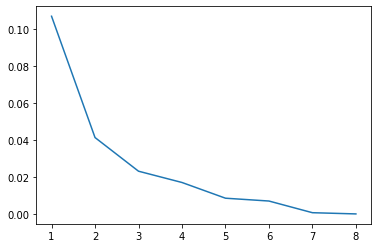

In [ ]:
# Plotting mse for different r values and printing mse for each r value
mode_mse=plot_modemse(n,mode_eigvectors,A_mean)

In [ ]:
from statistics import mean 
print("Mean of pca_mean square error:",mean(pca_mse))
print("Mean of mode shape approach mean square error: ",mean(mode_mse))

Mean of pca_mean square error: 0.014027498261396694
Mean of mode shape approach mean square error:  0.025514675746597944


We can observe that PCA approach works better than mode shape approach when we are using Force as normal distribution.